In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reddit-usernames/users.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
df = pd.read_csv('/kaggle/input/reddit-usernames/users.csv')
df.head()

,author,n
0,Lee4an,46
1,Partypooper009,80
2,Jenna1021,41
3,ALMEHZA_02,1
4,Fakehashish,32


In [5]:
df.columns

Index(['author', 'n'], dtype='object')

In [6]:
# Basic statistics
print(df.describe())

                  n
count  2.586574e+07
mean   1.416775e+02
std    7.271859e+04
min    1.000000e+00
25%    1.000000e+00
50%    4.000000e+00
75%    2.600000e+01
max    3.692686e+08


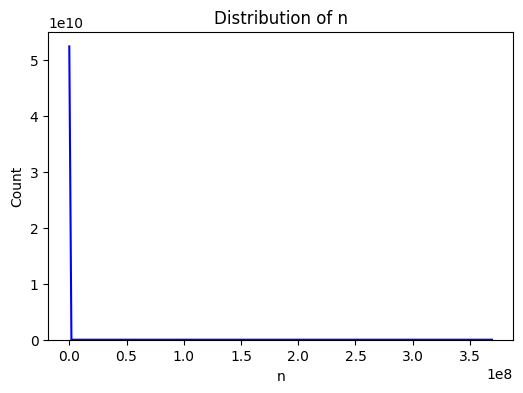

In [7]:
# Distribution of 'n'
plt.figure(figsize=(6,4))
sns.histplot(df['n'], bins=30, kde=True, color='blue')
plt.title('Distribution of n')
plt.show()

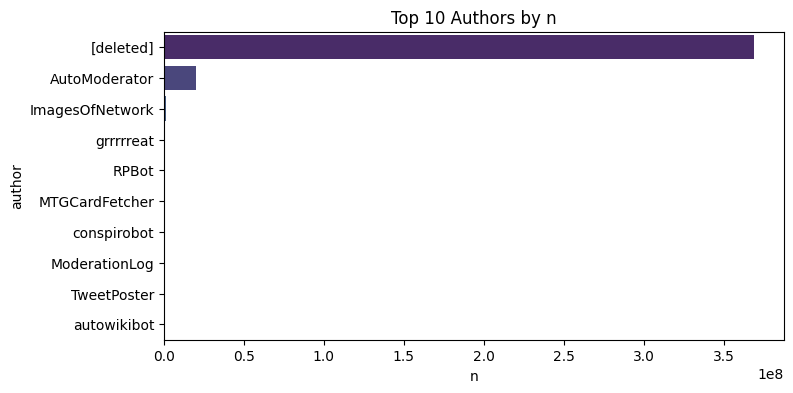

In [8]:
# Top 10 authors by 'n'
plt.figure(figsize=(8,4))
top_authors = df.sort_values('n', ascending=False).head(10)
sns.barplot(x='n', y='author', data=top_authors, palette='viridis')
plt.title('Top 10 Authors by n')
plt.show()

In [9]:
# Encode author names into numbers
df['author_encoded'] = df['author'].astype('category').cat.codes

In [10]:
# Features and target
X = df[['author_encoded']]
y = df['n']

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict on test set
y_pred = model.predict(X_test)

In [14]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RandomForestRegressor RMSE:", rmse)

RandomForestRegressor RMSE: 1197.0976594804868


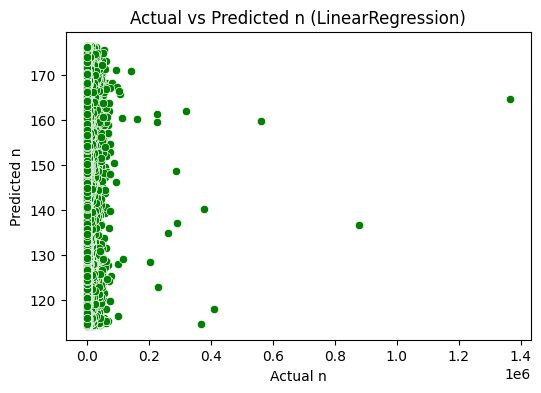

In [15]:
# Actual vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel('Actual n')
plt.ylabel('Predicted n')
plt.title('Actual vs Predicted n (LinearRegression)')
plt.show()